In [35]:
#=_


In [1]:
from PIL import Image
import numpy as np
import math
import collections 
import matplotlib.pyplot as plt

# Tell numpy to print numbers to 4 decimal places only
np.set_printoptions(precision=4, suppress=True)

In [2]:
## global variable
maxPixel = 255 ##for gray level image

def img2matrix(img):
    return np.asarray(img).copy()
def matrix2img(matrix):
    return Image.fromarray(matrix).convert("L")

def showImg(originalImg,newImg,new_title="new Image",original_title = "original Image"):
    fig = plt.figure(figsize=(15,15))
    fig1 = fig.add_subplot(121)
    fig2 = fig.add_subplot(122)
    fig1.imshow(originalImg,cmap="gray")
    fig2.imshow(newImg,cmap="gray")
    fig1.title.set_text(original_title)
    fig2.title.set_text(new_title)
    plt.show()

<hr style="border:2px solid gray"> </hr>

# printing basic info of the image and its matrix

In [2]:
def basicInfo():
    img = Image.open("image_Assets/random-Image/shape.jpg")
    print("(width x height )",img.size)
    grayImg = img.convert('L')
    imgMatrix= np.asarray(grayImg)
    print("(row x col )",imgMatrix.shape)
    print("\n\nmatrix representaion\n",imgMatrix)
    print("showing color img")
    img.show()
    print("showing gray image")
    grayImg.show()

In [3]:
basicInfo() 

NameError: name 'Image' is not defined

<hr style="border:2px solid gray"> </hr>
## image negation

In [226]:
def imgNegation(img): # takes image as input 
    imgMatrix = img2matrix(img)
    imgMatrix = imgMatrix 
    for i in range(imgMatrix.shape[0]):
        for j in range(imgMatrix.shape[1]):
            imgMatrix[i][j] = 255 - imgMatrix[i][j]  # new pixelvalue = (max pixel value of the grayscale image) - old pixel value 
    return matrix2img(imgMatrix)

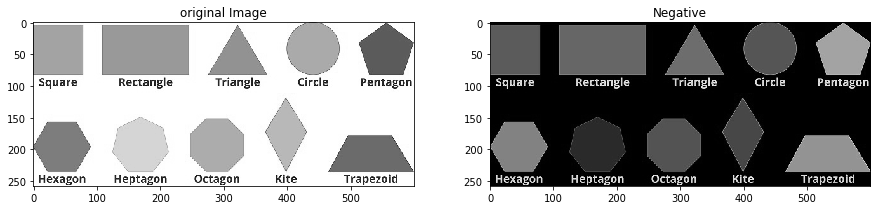

In [227]:
img = Image.open("image_Assets/random-Image/shape.jpg").convert('L')
nagImg = imgNegation(img)
showImg(img,nagImg,"Negative")

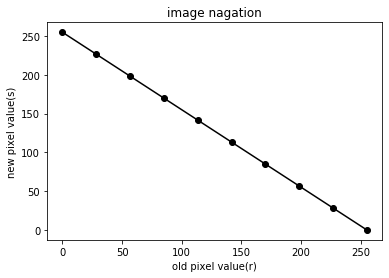

In [228]:
def nagationfun(x):
    return 255-x
r = np.linspace(0,255,10)
s =np.array(list(map(nagationfun,r)))

plt.title("image nagation")
plt.xlabel("old pixel value(r)")
plt.ylabel("new pixel value(s)")
plt.plot(r,s,"-ok")
plt.show()

<hr style="border:2px solid gray"> </hr>

# GRAYSCALE INTO BINARY IMAGE 

In [4]:
def binaryImg(img,threshold= 127): # floor(255/2)
    imgMatrix = img2matrix(img)   
    for i in range(imgMatrix.shape[0]):
        for j in range(imgMatrix.shape[1]):
            if imgMatrix[i][j] > threshold:
                imgMatrix[i][j] = 255
            else:
                imgMatrix[i][j] = 0
                
    return matrix2img(imgMatrix)


In [3]:
img = Image.open("image_Assets/random-Image/cat2.jpg").convert("L")
threshold = 70

bImg = binaryImg(img,threshold) # change threshold value between 0 to 255, to get different nature of the image

showImg(img,bImg,original_title="original Image",new_title="binary Image")

NameError: name 'binaryImg' is not defined

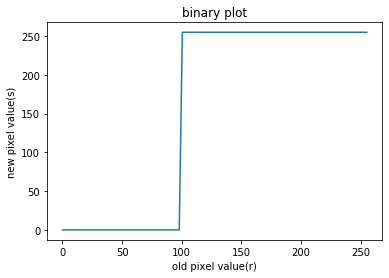

In [231]:
def binValue(r,threshold=100):
    if r >= threshold:
        return 255
    else:
        return 0

    
r = np.linspace(0,255,100)
s = np.array(list(map(binValue,r)))


plt.title("binary plot")
plt.ylabel("new pixel value(s)")
plt.xlabel("old pixel value(r)")
plt.plot(r,s)
plt.show()


***
***
#   LOG TRANSFORMATION
### general form of log transformation :
###                                  s = c log(1+r) ;
##### where s is a new pixel value , r is a old pixel value and c is a scaling constant. The value of c is chosen such that we get the maximum output value corresponding to the bit size used. e.g for 8 bit image, c is chosen such that we get max value equal to 255.


In [232]:
def logTransformation(img):
    imgMatrix = img2matrix(img)
    c = 255/(math.log(1 + 255)) # c = 255/(log(1 + max_input_pixel_value))
    for i in range(imgMatrix.shape[0]):
        for j in range(imgMatrix.shape[1]):
            imgMatrix[i][j] = c * math.log(1+imgMatrix[i][j])
    return matrix2img(imgMatrix)

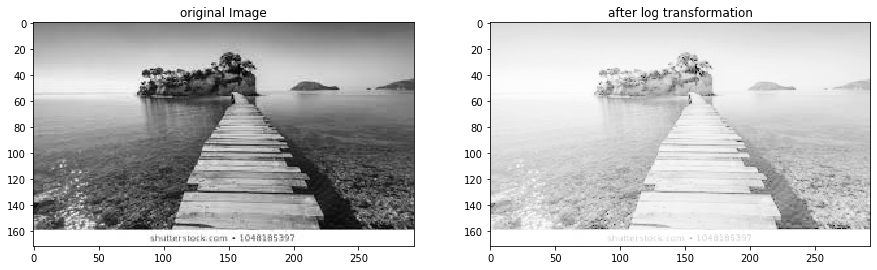

In [233]:
img = Image.open("image_Assets/random-Image/sceneColored.jpg").convert('L')
logImg = logTransformation(img)
showImg(img,logImg,"after log transformation")

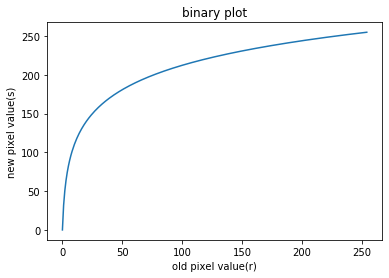

In [234]:
def logTrans(r):
    c = 255/(math.log(1 + 255))
    return (c*math.log(r+1))

r = np.arange(255)
s = np.array(list(map(logTrans,r)))

plt.title("binary plot")
plt.ylabel("new pixel value(s)")
plt.xlabel("old pixel value(r)")
plt.plot(r,s)
plt.show()

<hr style="border:2px solid gray"> </hr>

# POWER LAW (GAMMA) TRANSFORMATION 
### general form of gamma transformation:
### &nbsp;&nbsp;&nbsp;  s = c *r <sup>γ<sup>

In [235]:
def powerLaw(img,gamma):
    imgMatrix = img2matrix(img)
    c = int(255/(255**gamma))
    for i in range(imgMatrix.shape[0]):
        for j in range(imgMatrix.shape[1]):
            imgMatrix[i][j] = c * imgMatrix[i][j]**gamma
    return matrix2img(imgMatrix)


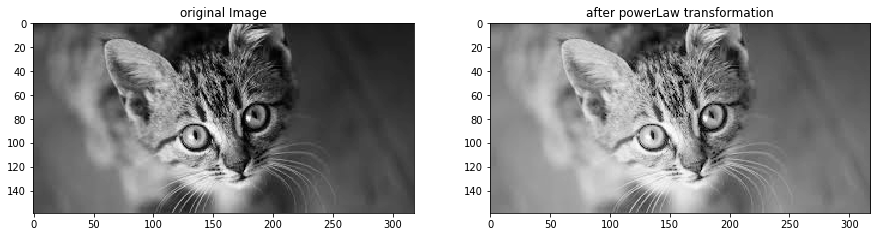

In [236]:
img = Image.open("image_Assets/random-Image/cat2.jpg").convert('L')
gamma = 0.6
newImg = powerLaw(img,gamma) ## change the gamma value to see the different result
showImg(img,newImg,"after powerLaw transformation")

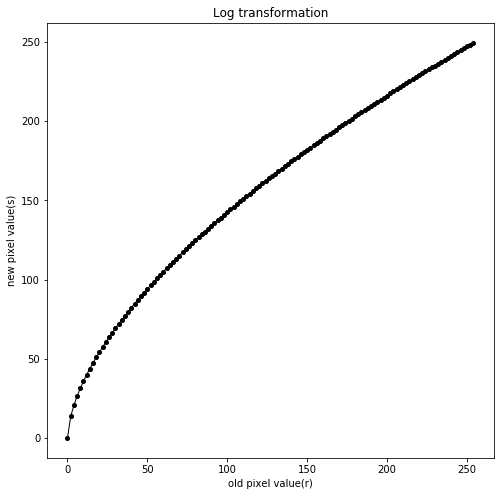

In [237]:
def gammaTrans(r,gamma=0.6):
    c = int(255/(255**gamma))
    return c*(r**gamma)

r = np.arange(0,255,2)
s = np.array(list(map(gammaTrans,r)))

plt.figure(figsize=(8,8))
plt.title("Log transformation")
plt.ylabel("new pixel value(s)")
plt.xlabel("old pixel value(r)")
plt.plot(r,s,"-ok",linewidth=1,markersize=4)
plt.show()

<hr style="border:2px solid gray"> </hr>


# CONTRAST STRETCHING , THRESHOLDING , CLIPPING


---
***
# HISTOGRAM EQUILIZATION

In [238]:

def histoEquilization(img):
    imgMatrix = img2matrix(img)
    pixels = list(imgMatrix.flatten())
    pixels.sort()
    freq = collections.Counter(pixels)
    pixelFreqTuple = (sorted(freq.items()))
    #list of available pixels in the image
    pixs = [key for (key,value) in pixelFreqTuple]
    #frequency of each pixels
    freq = [value for (key,value) in pixelFreqTuple]
    totalPixels = imgMatrix.size # sum(freq) --> both give the same result
    #normal frequency 
    normalFreq = [ data/totalPixels for data in freq]
    #cumulative normal frequency / cdf
    cumFreq = normalFreq
    for i in range(len(cumFreq)-1):
            cumFreq[i+1] = cumFreq[i]+cumFreq[i+1]
    
    
    histoEqui = [math.floor(maxPixel*data) for data in cumFreq ] ##equilization and roundoff
    
    # new pixels 
    newPixels = histoEqui
    
    # dict of old and new pixels
    dictPix = dict(zip(pixs,newPixels))
    
    # new image
    
    for i in range(imgMatrix.shape[0]):
        for j in range(imgMatrix.shape[1]):
            imgMatrix[i][j] = dictPix[imgMatrix[i][j]]
    
    # new frequency calculation
    
    newpixels = list(imgMatrix.flatten())
    newpixels.sort()
    newfreq = collections.Counter(newpixels)
    newpixelFreqTuple = (sorted(newfreq.items()))
    #list of available pixels in the image
    newpixs = [key for (key,value) in newpixelFreqTuple]
    #frequency of each pixels
    newfreq = [value for (key,value) in newpixelFreqTuple]
    
    
    return {"img":matrix2img(imgMatrix),"oldPix":pixs,"freq":freq,"newPix":newpixs,"newfreq":newfreq}
   
    
    
    

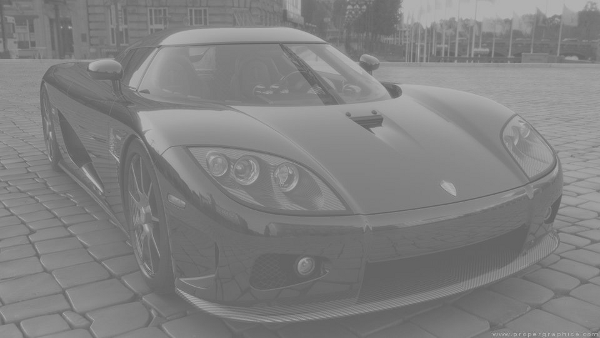

In [239]:
img = Image.open("image_Assets/lowContrast/car.png").convert('L')
img

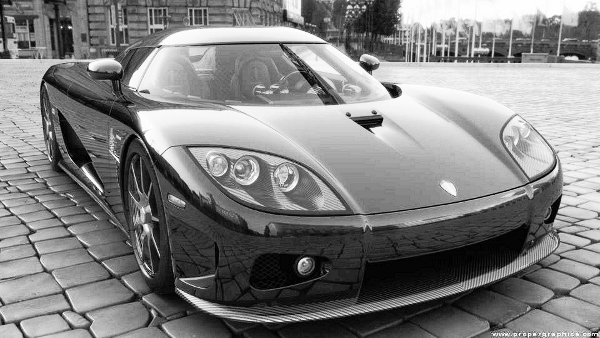

In [240]:
res = histoEquilization(img)
res["img"]

## histogram of the original image

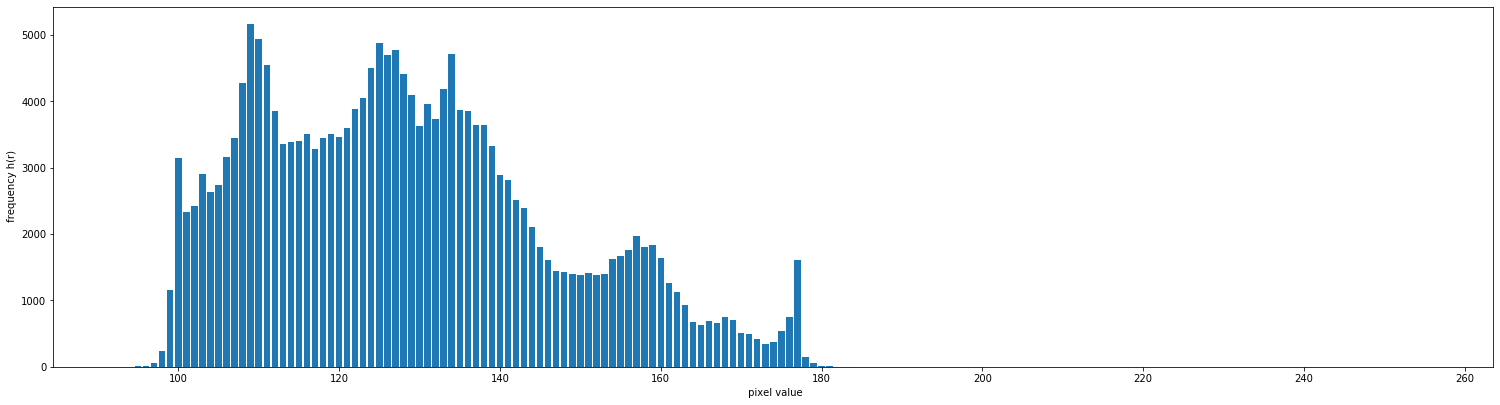

In [241]:

fig = plt.figure(figsize=(20,5))
ax = fig.add_axes([0,0,1,1])
pixValue  = res["oldPix"]
freq = res["freq"]

# to expand the graph x size
pixValue.append(255)
freq.append(0)

ax.bar(pixValue,freq)
plt.xlabel(" pixel value")
plt.ylabel(" frequency h(r)")
plt.show()

## after histogram equilization

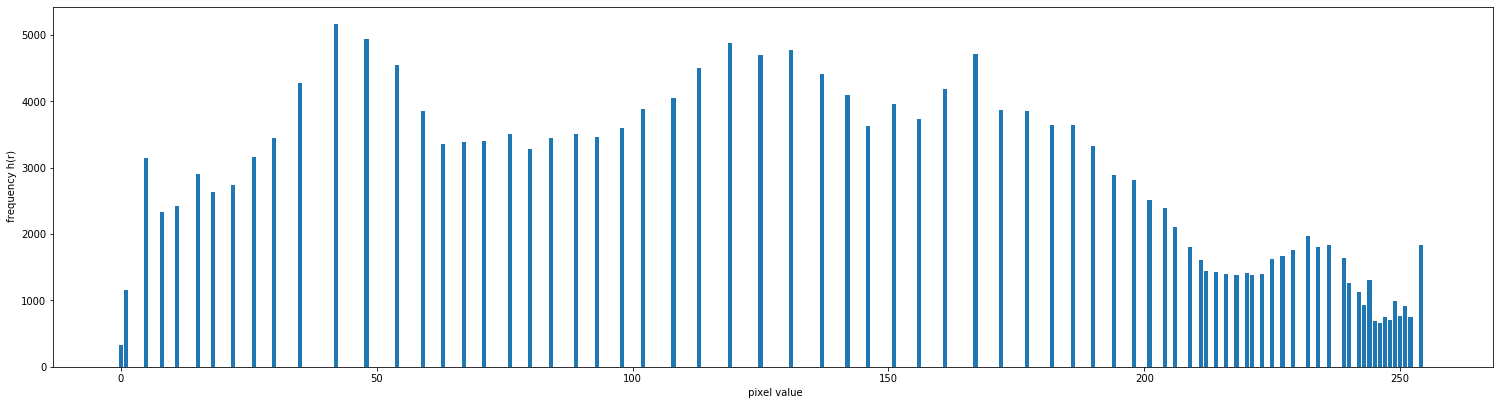

In [242]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_axes([0,0,1,1])
newpixValue  = res["newPix"]
newfreq = res["newfreq"]

ax.bar(newpixValue,newfreq)
plt.xlabel(" pixel value")
plt.ylabel(" frequency h(r)")
plt.show()

<hr style="border:2px solid gray"> </hr>

# INTENSITY LEVEL SLICING

## without background:
        s ={ L  if a <= r <= b
           { 0  else
## with background:
        s = { L if a<= r <= b
            { r else

In [243]:
def ILSwithoutBackground(img,a,b):
    imgMatrix = img2matrix(img)
    for i in range(imgMatrix.shape[0]):
        for j in range(imgMatrix.shape[1]):
            r = imgMatrix[i][j]
            if ( r >= a and r <= b):
                imgMatrix[i][j] = maxPixel
            else:
                imgMatrix[i][j] = 0
    return matrix2img(imgMatrix)

In [244]:
def ILSwithBackground(img,a,b):
    imgMatrix = img2matrix(img)
    for i in range(imgMatrix.shape[0]):
        for j in range(imgMatrix.shape[1]):
            r = imgMatrix[i][j]
            if (r >= a and r <= b):
                imgMatrix[i][j] = maxPixel
            
    return matrix2img(imgMatrix)

### origina image:

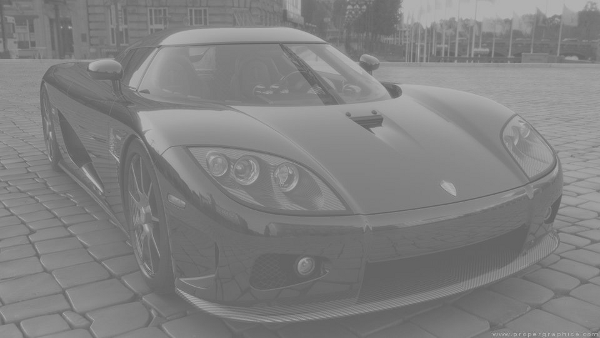

In [245]:

img = Image.open("image_Assets/lowContrast/car.png").convert('L')
img

### intensity level slicing with background:

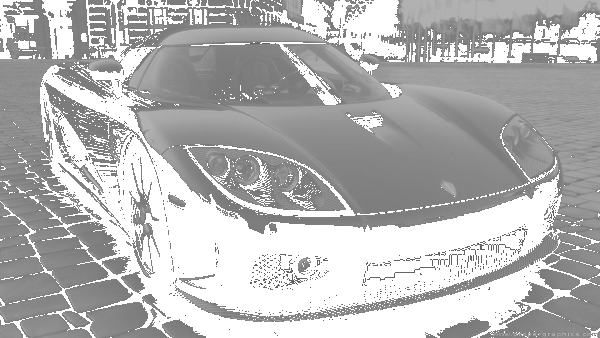

In [246]:
ILSwithBackground(img,100,120)

### intensity level slicing without background:

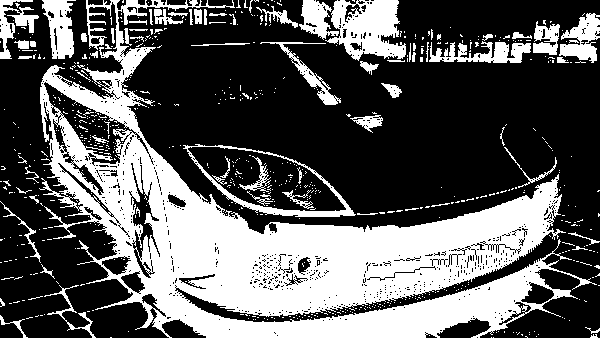

In [247]:
ILSwithoutBackground(img,100,120)


<hr style="border:2px solid gray"> </hr><hr style="border:2px solid gray"> </hr>

# Image magnification 🔎

## 1. zero interlacing

In [248]:
def zeroInterlacing(img):
    imgMatrix = img2matrix(img)
    oldHeight = imgMatrix.shape[0]
    oldWidth = imgMatrix.shape[1]
    newHeight = 2*oldHeight
    newWidth = 2 * oldWidth 

    ## providing zero interlacing
    newImgMatrix = np.zeros((newHeight,newWidth),dtype=int) 
    newImgMatrix[::2,::2] = imgMatrix[:,:]
    
    ## convolution
    ## mask = [[1,1],[1,1]]
    for r in range(0,newImgMatrix.shape[0]-1,2):
        for c in range(0,newImgMatrix.shape[1]-1,2):
            ##masking
                for i in range(2):
                    for j in range(2):
                        newImgMatrix[r+i][c+j]= newImgMatrix[r][c]
#     print(newImgMatrix)
#     print(imgMatrix)
    return matrix2img(newImgMatrix)

In [249]:
img = Image.open("image_Assets/lowContrast/women.gif").convert('L')
magnifiedImg = zeroInterlacing(img)


## before magnification:

In [250]:
img.show()
print(img.size)

(256, 256)


### After magnification

In [251]:
magnifiedImg.show()
print(magnifiedImg.size)

(512, 512)


## double magnification
***Note that we can perform crop operation to maintain the viewport size***

In [252]:
dblMagnifiedImg = zeroInterlacing(magnifiedImg)
dblMagnifiedImg.show()
print("size of the result image",dblMagnifiedImg.size) 


size of the result image (1024, 1024)


<hr style="border:2px solid gray"> </hr>

## 2.  Linear interpolation

In [253]:
def linearInterpolation(img):
    imgMatrix = img2matrix(img)
    oldHeight = imgMatrix.shape[0]
    oldWidth = imgMatrix.shape[1]
    newHeight = 2*oldHeight
    newWidth = 2 * oldWidth 

    ## providing zero interlacing
    newImgMatrix = np.zeros((newHeight,newWidth),dtype=int) 
    newImgMatrix[::2,::2] = imgMatrix[:,:]
    
    ## convolution
    ## mask = [[1,1],[1,1]]
    for r in range(0,newImgMatrix.shape[0]-1,2): ## for column interpolation 
        for c in range(1,newImgMatrix.shape[1],2):
                    if c != newImgMatrix.shape[1]-1: 
                        newImgMatrix[r][c]= math.ceil(newImgMatrix[r][c-1]+newImgMatrix[r][c+1])/2 
                    else: # for last column
                        newImgMatrix[r][c]= math.ceil(newImgMatrix[r][c-1])/2
                        
    for r in range(1,newImgMatrix.shape[0],2): ## for row interpolation 
        for c in range(0,newImgMatrix.shape[1]):
            if r != newImgMatrix.shape[0]-1:
                newImgMatrix[r][c] = math.ceil(newImgMatrix[r-1][c]+newImgMatrix[r+1][c])/2
            else:
                newImgMatrix[r][c] = math.ceil(newImgMatrix[r-1][c])/2
                        
#     print(newImgMatrix)
#     print(imgMatrix)
#     print(newImgMatrix)
    return matrix2img(newImgMatrix)
    

In [254]:
img = Image.open("image_Assets/lowContrast/car.png").convert('L')
magnifiedImg = linearInterpolation(img)



###  before magnification:


In [255]:
img.show()
print(img.size)

(600, 338)


### after magnification:

In [256]:
magnifiedImg.show()
print(magnifiedImg.size)

(1200, 676)


# SPATIAL FILTER

## smooting with linear filter
## AVERAGING FILTER
***linear filter is also known as convolution filter***

In [180]:
def convolution_avg(matrix,mask): #keeping border value unchanged
    newMatrix =np.copy(matrix)
    for r in range(1,matrix.shape[0]-1):
        for c in range(1,matrix.shape[1]-1):
            newPix = 0
            for i in range(mask.shape[0]):
                for j in range(mask.shape[1]):
                    newPix += matrix[r+i-1][c+j-1]*mask[i][j]
            newMatrix[r][c] = int(newPix)
    return newMatrix

def avg_filter(img):
    imgMatrix = img2matrix(img)
    mask =np.array([
            [1/9,1/9,1/9],
            [1/9,1/9,1/9],
            [1/9,1/9,1/9]
                          ]) ## kernel size is 3*3
    
    newMatrix = convolution_avg(imgMatrix,mask)
    return matrix2img(newMatrix)

In [258]:
img = Image.open("image_Assets/noise/noisy5.jpg").convert("L")
avgImg = avg_filter(img)

### original noisy image

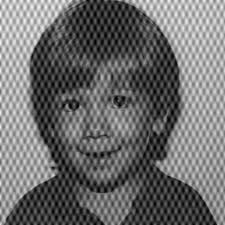

In [259]:
img

### after average filter

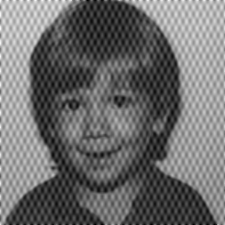

In [260]:
avgImg

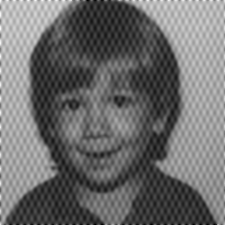

In [261]:
avgImg = avg_filter(avgImg)
avgImg # run this code repeatedly to see the changes

<hr style="border:2px solid gray"> </hr>

## NONE LINEAR SPATIAL FILTER(ORDER STATISTIC FILTER)

# 1. MEDIAN FILTER

   - it is a non-linear filter

   - use for signal smoothing and noise surpression

   - it doesnot use convolution(Convolution provides a way of multiplying together two arrays of numbers, generally of different sizes, but of the same dimensionality, to produce a third array of numbers of the same dimensionality) to process like linear filter




In [262]:
## effective one but not provide much flexibility and error
# def median_filter(img):
#     imgMatrix = img2matrix(img)
#     for r in range(1,imgMatrix.shape[0]-1):
#         for c in range(1,imgMatrix.shape[1]-1):
#             imgMatrix[r][c] = np.median([imgMatrix[r-1][c-1],imgMatrix[r-1][c],imgMatrix[r-1][c+1],
#                                      imgMatrix[r][c-1],imgMatrix[r][c],imgMatrix[r][c+1],
#                                      imgMatrix[r+1][c-1],imgMatrix[r+1][c],imgMatrix[r+1][c+1]]
#                                         )
#     return matrix2img(imgMatrix)

In [186]:
def process_window_median(matrix,windowSize):  ## need to find a flexible way to process different sized filter/window
    newMatrix = np.copy(matrix)
    for r in range(1,matrix.shape[0]-1):
         for c in range(1,matrix.shape[1]-1): 
                window = np.array([])
                
                for i in range(windowSize[0]): # scanning window
                    for j in range(windowSize[1]):
                        window = np.append(window,matrix[r+i-1][c+j-1])        
                newMatrix[r][c] = np.median(window)
    return newMatrix


def median_filter(img):
    imgMatrix = img2matrix(img)
    windowSize = (3,3)
    newMatrix = process_window_median(imgMatrix,windowSize)
    return matrix2img(newMatrix)

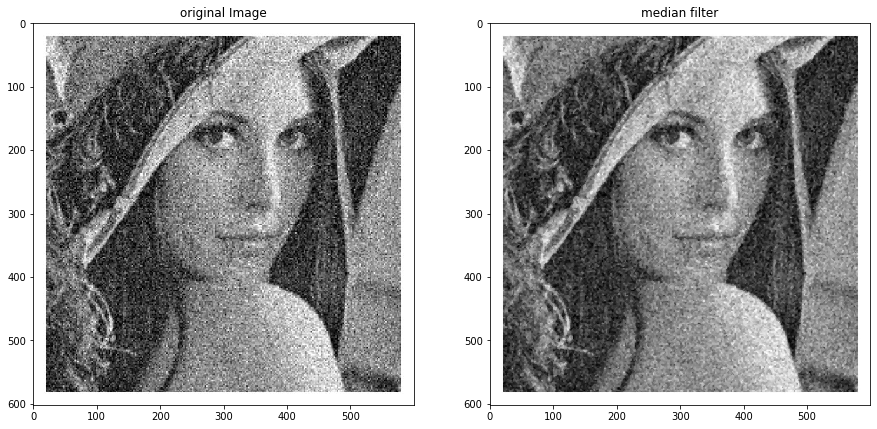

In [264]:
img = Image.open("image_Assets/noise/noisy2.png")
medianImg = median_filter(img)
showImg(img,medianImg,"median filter")

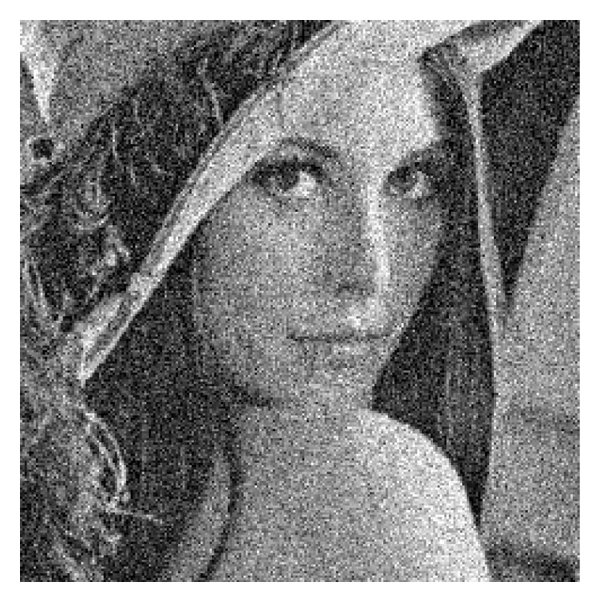

In [265]:
img

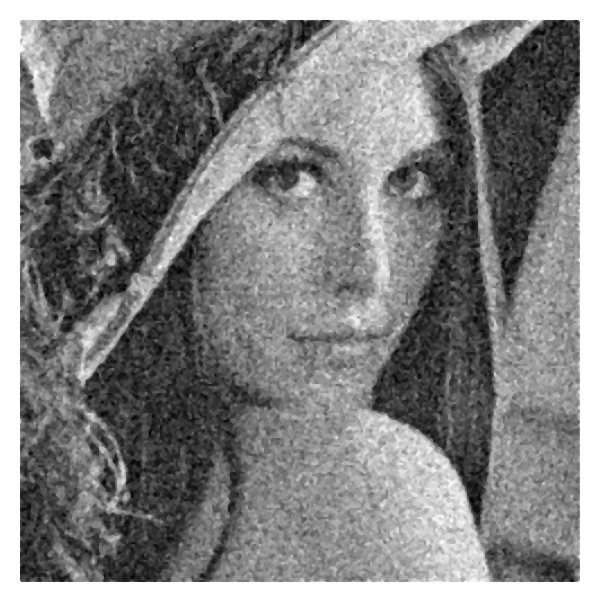

In [266]:
medianImg = median_filter(medianImg)
medianImg

<hr style="border:2px solid gray"> </hr>

# 2. MAX FILTER
- use for finding the brightest point of an image
- reduces pepper noise but enhances salt noise


In [298]:
def process_window_max(matrix,windowSize):
    newMatrix =np.copy(matrix)
    for r in range(1,matrix.shape[0]-1):
         for c in range(1,matrix.shape[1]-1): 
                window = np.array([])
                for i in range(windowSize[0]): # scanning window
                    for j in range(windowSize[1]):
                        window = np.append(window,matrix[r+i-1][c+j-1])
                        
                newMatrix[r][c] = np.max(window)
    return newMatrix

    
def max_filter(img):
    imgMatrix = img2matrix(img)
    windowSize = (1,1)
    imgMatrix = process_window_max(imgMatrix,windowSize)
    return matrix2img(imgMatrix)

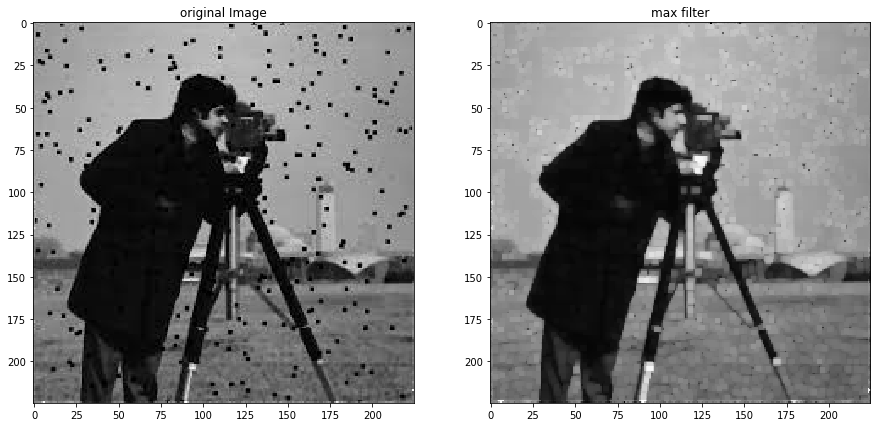

In [268]:
img = Image.open("image_Assets/noise/pepperNoise.jpg").convert('L')
imgMax = max_filter(img)
showImg(img,imgMax,"max filter")

<hr style="border:2px solid gray"> </hr>

# 3. MIN FILTER
- is a opposite of max filter
- used to find the dull points of an image

In [174]:
def process_window_min(matrix,windowSize):
    newMatrix = np.copy(matrix)
    for r in range(1,matrix.shape[0]-1):
         for c in range(1,matrix.shape[1]-1): 
                window = np.array([])
                for i in range(windowSize[0]): # scanning window
                    for j in range(windowSize[1]):
                        window = np.append(window,matrix[r+i-1][c+j-1])
                        
                newMatrix[r][c] = np.min(window)
    return newMatrix

    
def min_filter(img):
    imgMatrix = img2matrix(img)
    windowSize = (2,2)
    
    newMatrix = process_window_min(imgMatrix,windowSize)
    return matrix2img(newMatrix)

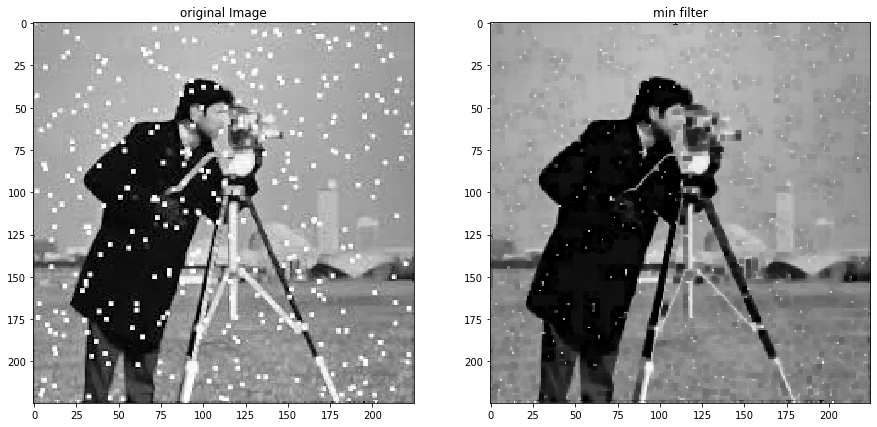

In [270]:
img = Image.open("image_Assets/noise/saltNoise.jpg").convert('L')
imgMin = min_filter(img)
showImg(img,imgMin,"min filter")

# FOURIER TRANSFORM 

## fast fourier transform (fft)




In [271]:
def fourierTransform(img):
    imgMatrix = img2matrix(img)
# transform spatial domain image into frequency domain using fft 
    imgfft = np.fft.fft2(imgMatrix)
# move zero frequency component to the center of the fourier spectrum
    imgfft = np.fft.fftshift(imgfft)
# computer magnitude (absolute value) of the complex number
    imgfft = abs(imgfft)
# computer the common logarithm of each value to reduce dynamic range
    imgfft = np.log10(imgfft)
    
# find the minimum value that is a finite number 
    minValue = np.nanmin(imgfft)
# find the maximum value that is a finite number
    maxValue = np.nanmax(imgfft)
    
# calculate the original contrast range
    originalRange = maxValue - minValue
# normalize the fourier image data    
    normFourier = (imgfft-minValue)/originalRange * 255
    
    return matrix2img(normFourier)
    
    



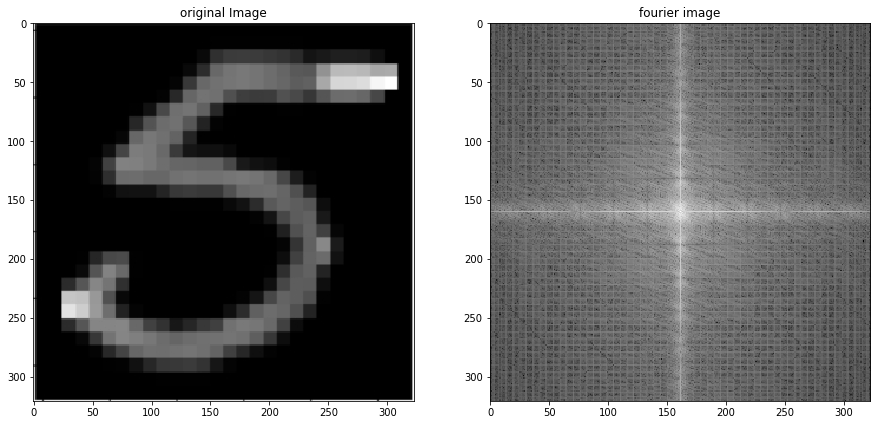

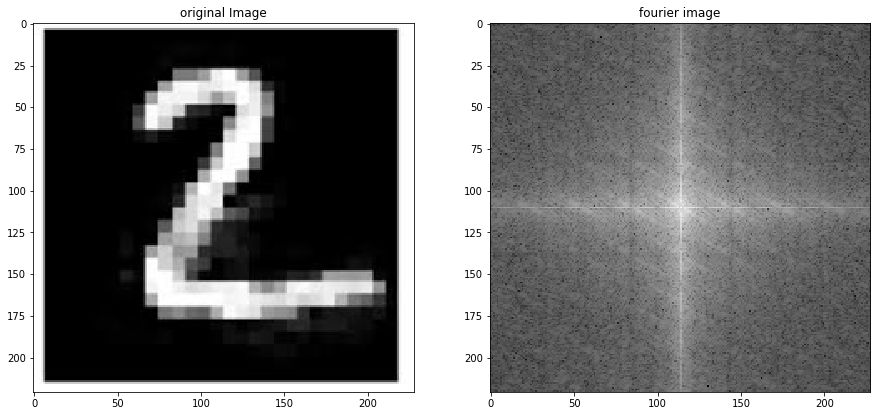

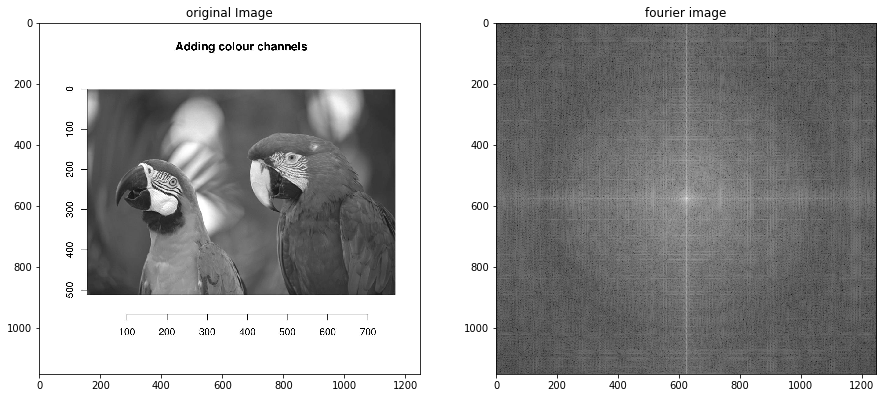

In [272]:
#img1
img = Image.open("image_Assets/characterSet/5.jpg").convert("L")
imgFFT = fourierTransform(img)
showImg(img,imgFFT,"fourier image")
#img2
img = Image.open("image_Assets/characterSet/2.jpg").convert("L")
imgFFT = fourierTransform(img)
showImg(img,imgFFT,"fourier image")
#img3
img = Image.open("image_Assets/random-Image/parrot.jpeg").convert("L")
imgFFT = fourierTransform(img)
showImg(img,imgFFT,"fourier image")

# Morphological image processing
Binary images may contain numerous imperfections. In particular, the binary regions produced by simple thresholding are distorted by noise and texture. Morphological image processing pursues the goals of removing these imperfections by accounting for the form and structure of the image. These techniques can be extended to greyscale images.

Morphological image processing is a collection of non-linear operations related to the shape or morphology of features in an image. According to Wikipedia, morphological operations rely only on the relative ordering of pixel values, not on their numerical values, and therefore are especially suited to the processing of binary images. Morphological operations can also be applied to greyscale images such that their light transfer functions are unknown and therefore their absolute pixel values are of no or minor interest.

Morphological techniques probe an image with a small shape or template called a structuring element. The structuring element is positioned at all possible locations in the image and it is compared with the corresponding neighbourhood of pixels. Some operations test whether the element "fits" within the neighbourhood, while others test whether it "hits" or intersects the neighbourhood:

## 1.Erosion:
The erosion of a binary image f by a structuring element s (denoted f  s) produces a new binary image g = f  s with ones in all locations (x,y) of a structuring element's origin at which that structuring element s fits the input image f, i.e. g(x,y) = 1 is s fits f and 0 otherwise, repeating for all pixel coordinates (x,y).

In [91]:
img = Image.open("image_Assets/characterSet/text4.jpg").convert("L")
# binaryImg = binaryImg(img)

In [92]:
bImg = binaryImg(img)
# showImg(img,bImg,"binary image")
# bImg

In [93]:

def erosion(img,SE,origin=(0,0)): # SE is a structuring element 
    
    imgMatrix = img2matrix(img)
    newMatrix = np.full_like(imgMatrix,255)
    for row in range(origin[0],imgMatrix.shape[0]+origin[0]-(SE.shape[0]-1)):
            for col in range(origin[1],imgMatrix.shape[1]+origin[1]-(SE.shape[1]-1)): 
                # mapping SE and img 
                flag = True  # initially, SE is a subset of the image 
                for x in range(SE.shape[0]):
                    for y in range(SE.shape[1]):

                        if imgMatrix[row+x-origin[0]][col+y-origin[1]] != SE[x][y]:
                            flag=False;
                            break;
                
                if flag == True:
                    newMatrix[row][col] = 0 #255 for grayImage [even though it is binary]
                else:
                    newMatrix[row][col] = 255
                    
    return matrix2img(newMatrix)                    
    

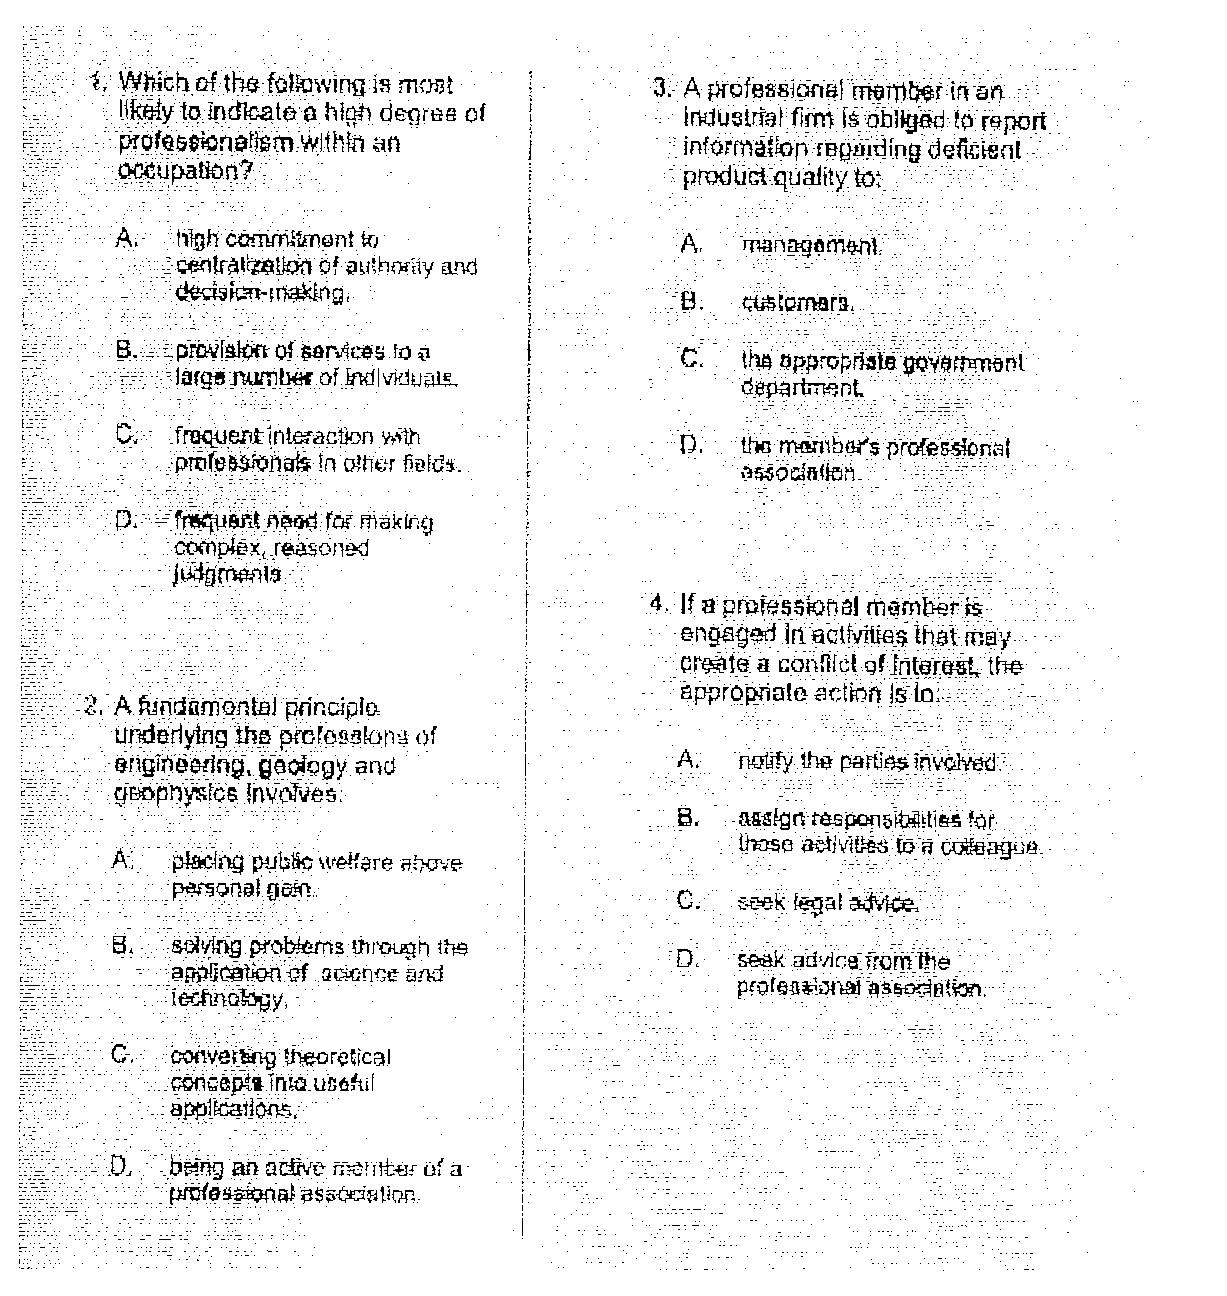

In [94]:
SE = np.array([
               [0,0],
               [0,0]
              ]) # 0 -> 1 in binaryImage (represents black) , 255 -> 0 in BinaryImage (represents white)
# SE = np.zeros((5,5))
erosionImg =erosion(bImg,SE,(1,1))
erosionImg

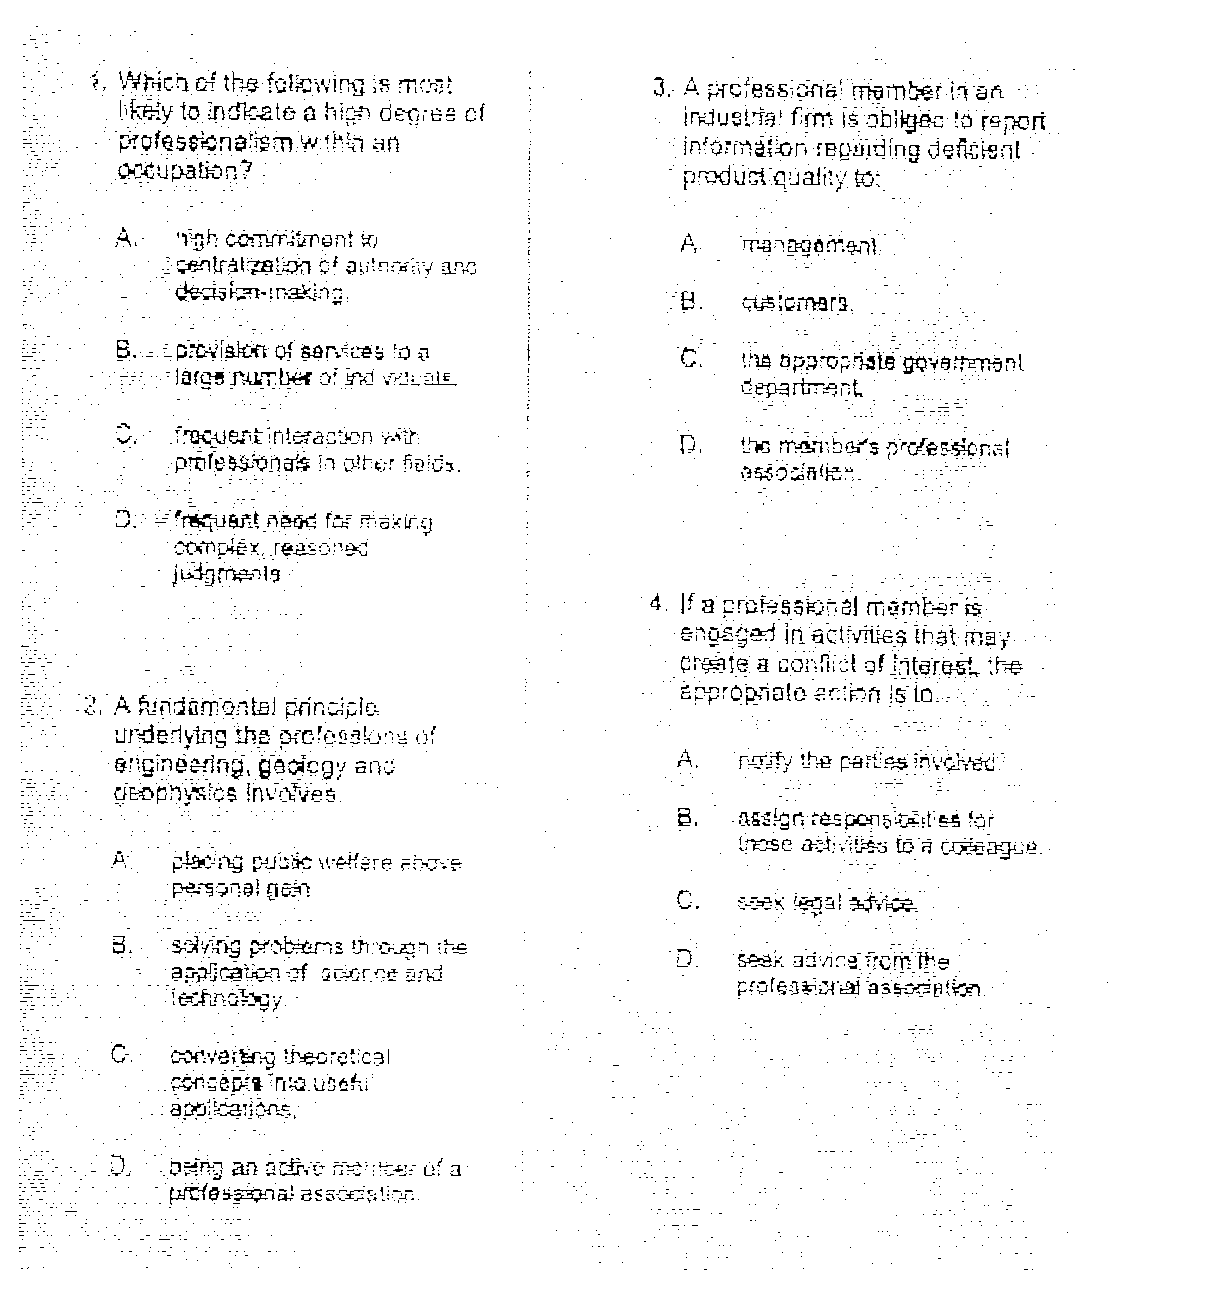

In [95]:

SE = np.array([
               [0,0],
              ]) # 0 -> 1 in binaryImage (represents black) , 255 -> 0 in BinaryImage (represents white)
# SE = np.zeros((5,5))
dblErosion =erosion(erosionImg,SE,(0,0))
dblErosion

## 2. Dilation:
The dilation of an image f by a structuring element s (denoted f  s) produces a new binary image g = f  s with ones in all locations (x,y) of a structuring element's orogin at which that structuring element s hits the the input image f, i.e. g(x,y) = 1 if s hits f and 0 otherwise, repeating for all pixel coordinates (x,y). Dilation has the opposite effect to erosion -- it adds a layer of pixels to both the inner and outer boundaries of regions.


In [96]:
def dilation(img,SE,origin=(0,0)): # SE is a structuring element 
    
    imgMatrix = img2matrix(img)
    newMatrix = np.full_like(img,255)
    
    for row in range(imgMatrix.shape[0]):
            for col in range(imgMatrix.shape[1]): 
                # mapping SE and img 
                flag = False  # initially, SE is a subset of the image 
                for x in range(SE.shape[0]):
                    for y in range(SE.shape[1]):
                        try: # exception handling for index out of bound
                            if imgMatrix[row+x-origin[0]][col+y-origin[1]] == SE[x][y]:
                                flag=True;
                                break;
                        except Exception as e:
                            pass
                        finally:
                            pass
                            
                if flag == True:
                    newMatrix[row][col] = 0 #255 for grayImage [even though it is binary image] - it is equivalent to 1
                else:
                    newMatrix[row][col] = 255
                    
#     print(newMatrix)
    return matrix2img(newMatrix)

## Testing dilation with fewer value:

In [97]:
A  = np.array([[255,255,255,255,255,255],
               [255,255,0,0,255,255],
               [255, 0, 0,0, 0,255],
               [255,255,0,0,255,255],
               [255,255,255,255,255,255]
             ])
B = np.array([ [0],
               [0],
               [0]
                  ])

newA = dilation(A,B,(1,0))
img2matrix(newA)


array([[255, 255,   0,   0, 255, 255],
       [255,   0,   0,   0,   0, 255],
       [255,   0,   0,   0,   0, 255],
       [255,   0,   0,   0,   0, 255],
       [255, 255,   0,   0, 255, 255]], dtype=uint8)

## Implimentation on real image 

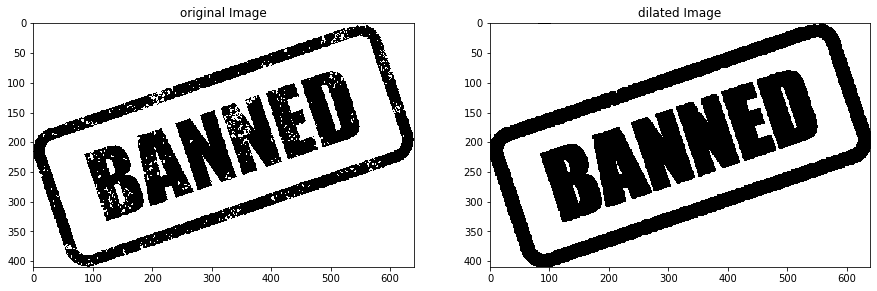

In [98]:
img = Image.open("image_Assets/characterSet/banned.jpg").convert("L")
binImg = binaryImg(img)
SE = np.array([
               [0,0,0,0,0],
               [0,0,0,0,0],
               [0,0,0,0,0],
               [0,0,0,0,0],
               [0,0,0,0,0]
              ]) # 0 -> 1 in binaryImage (represents black) , 255 -> 0 in BinaryImage (represents white)
# SE = np.zeros((5,5))
dilatedImg =dilation(binImg,SE,(2,2))
showImg(binImg,dilatedImg,"dilated Image")

## 1 .OPENING:
an opening is defined as an erosion followed by a dilation using the same structuring element for both operations.

Opening = (Img(erosion)SE)(dilation)SE

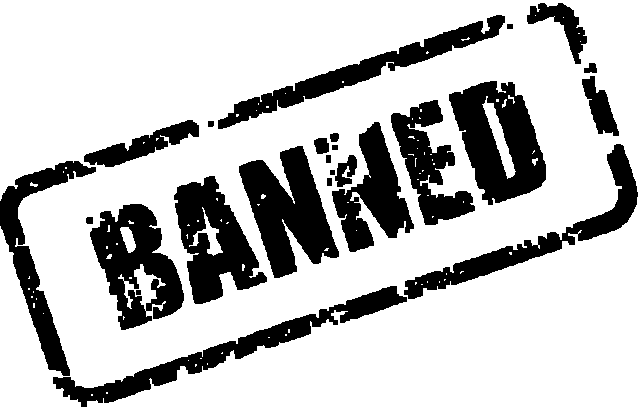

In [103]:
img = Image.open("image_Assets/characterSet/banned.jpg").convert("L")
binImg = binaryImg(img)
SE = np.array([
               [0,0,0,0,0],   # this is equivalent to binary matrix  [1,1,1,1,1]
               [0,0,0,0,0],   #                                      [1,1,1,1,1]
               [0,0,0,0,0],   #                                      [1,1,1,1,1]
               [0,0,0,0,0],   #                                      [1,1,1,1,1]
               [0,0,0,0,0],   #                                      [1,1,1,1,1]
              ]) # 0 -> 1 in binaryImage (represents black) , 255 -> 0 in BinaryImage (represents white)
# SE = np.zeros((5,5))
openedImg = dilation(erosion(binImg,SE,(1,1)),SE,(1,1))
openedImg

## 2. CLOSING : 

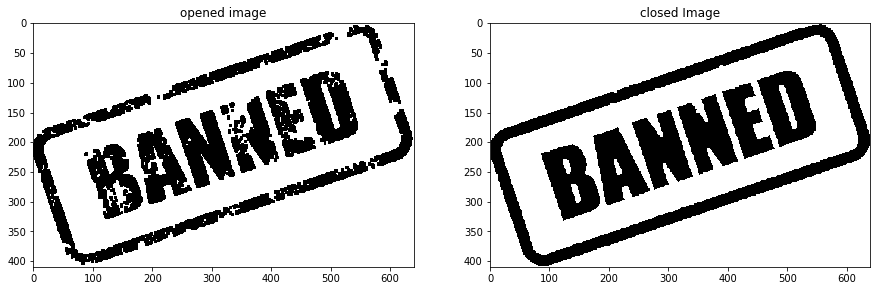

In [100]:
img = Image.open("image_Assets/characterSet/banned.jpg").convert("L")
binImg = binaryImg(img)
SE = np.array([
               [0,0,0,0,0],
               [0,0,0,0,0],
               [0,0,0,0,0],
               [0,0,0,0,0],
               [0,0,0,0,0], 
              ]) # 0 -> 1 in binaryImage (represents black) , 255 -> 0 in BinaryImage (represents white)
# SE = np.zeros((5,5))
closedImg = erosion(dilation(binImg,SE,(1,1)),SE,(2,2))
showImg(openedImg,closedImg,original_title="opened image",new_title="closed Image")

<hr style="border:1px solid gray"></hr>
# Boundary extraction
b(A) = A - (A (erosion) B)

In [101]:
def set_diff(X,Y):
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            if (X[i][j]==Y[i][j]):
                X[i][j]=255 #ignoring pixel , binary value 0
    return X


In [102]:
def boundaryExtraction(img,SE,origin=(0,0)):
    imgMatrix = img2matrix(img)
    newMatrix = set_diff(imgMatrix,img2matrix(erosion(imgMatrix,SE,origin))) # formula : A - ( A erosion B)
    return matrix2img(newMatrix)

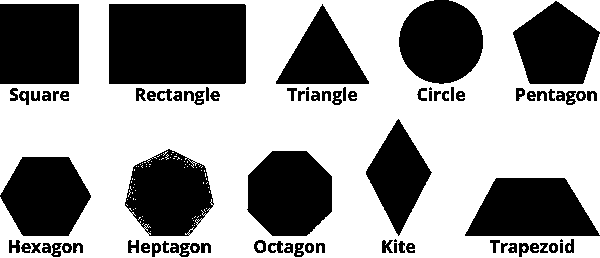

In [285]:
img = Image.open("image_Assets/random-Image/shape.jpg").convert("L")
binImg = binaryImg(img,220)
# SE = np.array([
#                [0,0,0,0,0],
#                [0,0,0,0,0],
#                [0,0,0,0,0],
#                [0,0,0,0,0],
#                [0,0,0,0,0],
#               ]) # 0 -> 1 in binaryImage (represents black) , 255 -> 0 in BinaryImage (represents white)
# SE = np.zeros((10,10))
binImg
# closedImg = erosion(dilation(binImg,SE,(1,1)),SE,(1,1)) # enhancing the image
# closedImg

In [286]:

extractedImg = boundaryExtraction(binImg,SE,(1,1)) # boundary extraction 


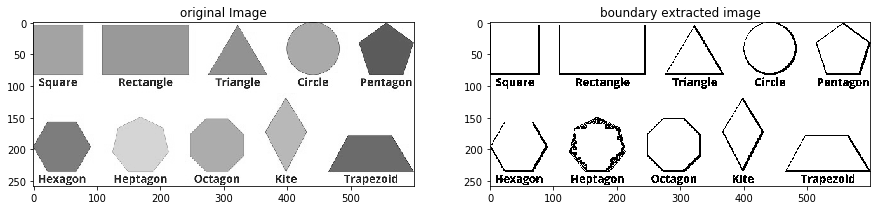

In [287]:
showImg(img,extractedImg,"boundary extracted image")

# combining two image 

In [17]:
def combine_images(x,y): 
    xmatrix = img2matrix(x)
    ymatrix = img2matrix(y)
    
    for i in range(0,xmatrix.shape[0]):
        for j in range(0,xmatrix.shape[1]):
            try:
#                 xmatrix[i][j] = ymatrix[math.floor(i)][math.floor(j)]
                xmatrix[i][j] = min(xmatrix[i][j],ymatrix[i][j])
            except Exception as E:
                pass
            finally:
                pass
    return matrix2img(xmatrix)

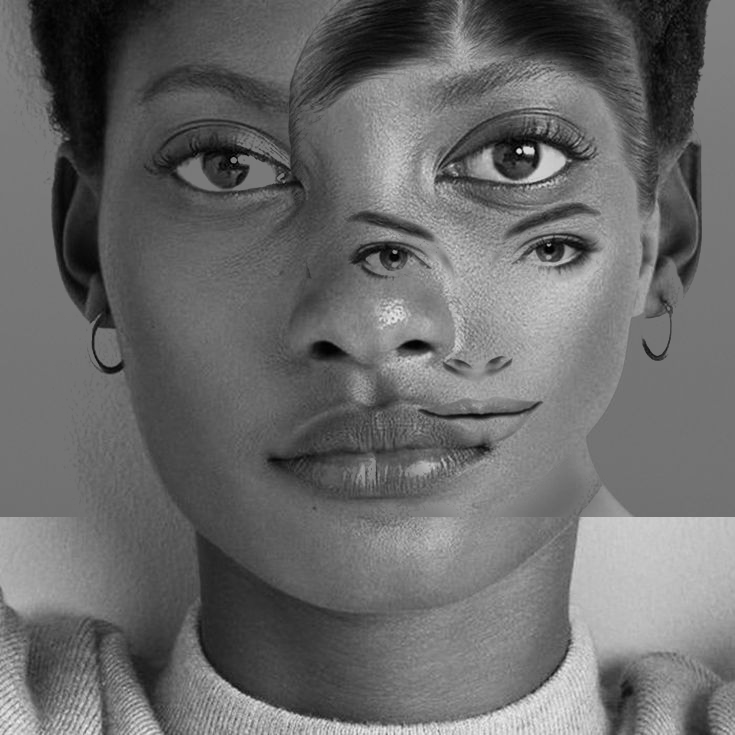

In [23]:
img1=Image.open("image_Assets/random-Image/face3.jpg").convert("L")
img2 = Image.open("image_Assets/random-Image/face2.jpg").convert("L")

combine_images(img1,img2)

<hr style="border:1px solid gray"></hr>

# image segmentation
In digital image processing and computer vision, image segmentation is the process of partitioning a digital image into multiple segments (sets of pixels, also known as image objects). The goal of segmentation is to simplify and/or change the representation of an image into something that is more meaningful and easier to analyze.

# convolution

In [24]:
def convolution(matrix,mask,origin=(0,0)):
#     newMatrix =np.copy(matrix)
    newMatrix = np.arange(np.size(matrix)).reshape(matrix.shape[0],matrix.shape[1])
#     newMatrix = np.zeros_like(matrix)

    for row in range(matrix.shape[0]):
            for col in range(matrix.shape[1]):  # 1,1 --> (1,1)
    
                newPix = 0
                outOfBound = False
                for x in range(mask.shape[0]):
                    for y in range(mask.shape[1]):
                        try: # exception handling for index out of bound
                            
                            if (row+x-origin[0]) < 0:
                                raise Exception
                            else:
                                newPix += int(matrix[row+x-origin[0]][col+y-origin[1]]) * mask[x][y]

                        except Exception as e:
                            outOfBound = True
                            break;
                        finally:
                            pass
                    if outOfBound == True:
                        break;
                        
                if  outOfBound == False:
                    newMatrix[row][col] = int(newPix)
                else:
                    newMatrix[row][col] = matrix[row][col]
                    
                 
                    
    return newMatrix

In [25]:
def removeSmallDetails(image,bgPix = 255 ,objPix =0 ,size=(3,3)): # size of the filter 
        matrix = img2matrix(image)
        Xs = int(size[0]/2)
        Ys = int(size[1]/2)
         
        for X in range(Xs,matrix.shape[0]-Xs):
            for Y in range(Ys,matrix.shape[1]-Ys):
                
                if matrix[X][Y] == objPix:
                    try:
                        #X,Y is the center of the filter
                        isSmallDetail = True # is isolated point    
                        #scan top and bottom row
                        for col in range(Y-Ys,Y+Ys+1):
                            #rows
#                             print("rows")
#                             print(matrix[X-Xs][col])
#                             print(matrix[X+Xs][col])
#                             print("rows")
#                             print(matrix[X-Xs][col],matrix[X+Xs][col])
                                  
                            if(matrix[X-Xs][col] != bgPix) or (matrix[X+Xs][col] != bgPix):
                                isSmallDetail = False
#                                 print("ok")
                                break;
                    
                        if (isSmallDetail == True):  
                            
                            #scan first and last columns
                            for row in range(X-Xs+1,X+Xs):
#                                     print("cols")
#                                     print(matrix[row][Y-Ys])
#                                     print(matrix[row][Y+Ys])
#                                     print("cols")
#                                 print((row,Y-Ys),(row,Y+Ys))
                                if ( matrix[row][Y-Ys] != bgPix) or  (matrix[row][Y+Ys] != bgPix ):
                                        isSmallDetail = False
#                                         print("pk")
                                        break;
                     
                        if isSmallDetail == True:
                            #change all the pixel of the isolated point into bgpixels
                            for i in range(X-Xs+1,X+Xs):
                                for j in range(Y-Ys+1,Y+Ys):
                                    matrix[i][j] = bgPix
                                   
                    except Exception as e:
                        pass
        return matrix2img(matrix)
#         return matrix


In [281]:
matrix = np.full((7,7),255)
# matrix = np.arange(36).reshape(6,6)

matrix[3][3] = 0

print(matrix)
matrix = removeSmallDetails(matrix,255,0,size=(6,6))
print(matrix)

[[255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255]
 [255 255 255   0 255 255 255]
 [255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255]]
<PIL.Image.Image image mode=L size=7x7 at 0x20633E23C40>


# edge detectors

* gradient based operator
    * Roberts filter
    * prewitt filter
    * sobel filter
    * canny filter
* laplacian based operator
    * Marr-Hildreth (LOG)
    * laplace
    

## laplacian filter
mask = [[0  1  0]
       [1 -4  1]
       [0  1  0]]

## LOG filter

mask = [[0,0,3,2,2,2,3,0,0],
        [0,2,3,5,5,5,3,2,0],
        [3,3,5,3,0,3,5,3,3],
        [2,5,3,-12,-23,-12,3,5,2],
        [2,5,0,-23,-40,-23,0,5,2],
        [2,5,3,-12,-23,-12,3,5,2],
        [3,3,5,3,0,3,5,3,3],
        [0,2,3,5,5,5,3,2,0],
        [0,0,3,2,2,2,3,0,0],
        ]

In [26]:
def laplacian_filter(image):
    imgMatrix = img2matrix(image)
#     imgMatrix = image
    # laplacian mask
#     mask = np.array([
#         [0,-1,0],
#         [-1,4,-1],
#         [0,-1,0]
#     ])
    
#     mask = np.array([
#         [1,1,1],
#         [1,-8,1],
#         [1,1,1]
# ])
    
    #log mask
    mask = np.array([
                        [0,0,3,2,2,2,3,0,0],
                        [0,2,3,5,5,5,3,2,0],
                        [3,3,5,3,0,3,5,3,3],
                        [2,5,3,-12,-23,-12,3,5,2],
                        [2,5,0,-23,-40,-23,0,5,2],
                        [2,5,3,-12,-23,-12,3,5,2],
                        [3,3,5,3,0,3,5,3,3],
                        [0,2,3,5,5,5,3,2,0],
                        [0,0,3,2,2,2,3,0,0],
                                                ])
    
#     mask = np.array([
#                       [0,0,1,0,0],
#                       [0,1,2,1,0],
#                       [1,2,-16,2,1],
#                       [0,1,2,1,0],
#                       [0,0,1,0,0],
#                             ])

  
    
    
    # applying convolution 
    newMatrix = convolution(imgMatrix,mask,(4,4))
    
    
    # thresholding 
    for row in range(newMatrix.shape[0]):
        for col in range(newMatrix.shape[1]):
            if newMatrix[row][col] < 0 :
                newMatrix[row][col] = 0
            else:
                newMatrix[row][col] = 255
            
   
    return matrix2img(newMatrix)
    

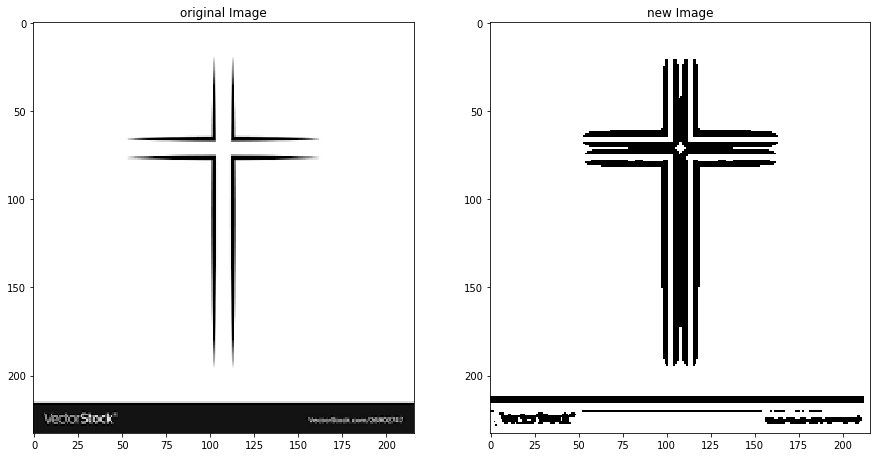

In [67]:
img = Image.open("image_Assets/random-Image/cross1.png").convert("L")
# img = binaryImg(img,153)
newImg = laplacian_filter(img)
showImg(img,newImg)


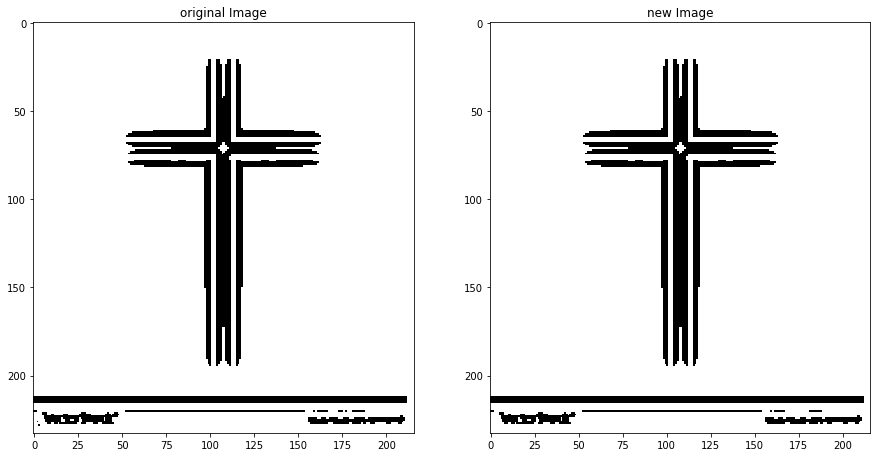

In [68]:
Img = removeSmallDetails(newImg,255,0,size=(7,7))
# Img  = max_filter(Img)
showImg(newImg,Img)

In [11]:
#save image 
newImg.save("C:/Users/Suman/Downloads/Image Processing using python/image_Assets/generated-Img/draw.jpg")

# closing morphological image processing

In [26]:
SE = np.array([
               [0,0]
              ]) # 0 -> 1 in binaryImage (represents black) , 255 -> 0 in BinaryImage (represents white)
SE1 = np.array([
               [0,0,0],
               [0,0,0],
               [0,0,0]
              ])
# SE = np.zeros((5,5))
# closedImg = erosion(dilation(newImg,SE,(0,0)),SE,(0,0))
# closedImg = dilation(newImg,SE,(0,0))

#max filter remove pepper noise 

imgMax = avg_filter(avg_filter(newImg))

# imgMax = median_filter(newImg)


showImg(newImg,imgMax,original_title="laplaced image",new_title="Image")

NameError: name 'avg_filter' is not defined

# laplacian filter in matrix

In [ ]:
matrix = np.array([
            [50,50,50,50,50,50],
            [50,50,50,50,50,50],
            [50,50,50,50,50,50],
            [100,100,100,100,100,100],
            [100,100,100,100,100,100],
            [100,100,100,100,100,100],
        ])
mask = np.array([
        [1,1,1],
        [1,-8,1],
        [1,1,1]
])

In [ ]:
laplacian_filter(matrix)

# Boundary representation
## Chain Code

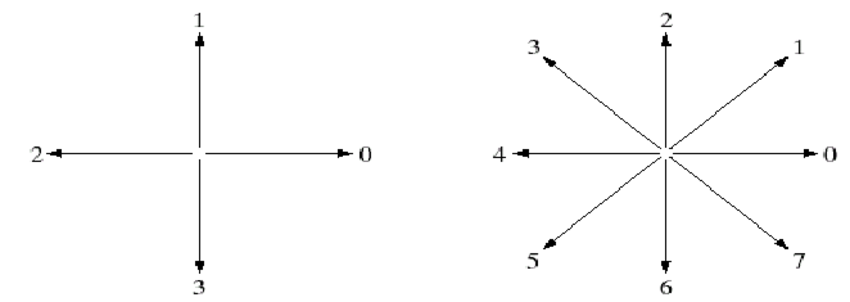

In [27]:
def getInitialPixel(matrix,edgePixel = 0):
    for row in range(matrix.shape[0]):
        for col in range(matrix.shape[1]):
            if matrix[row][col]  == edgePixel : # edge pixel
                return (row,col)

def  scanImg(imgMatrix,scannedPix,currentPix,edgePix=0):
    while(True):
#         #scanning eight neighbours anticlockwise
        if imgMatrix[currentPix[0]][currentPix[1]+10] == edgePix and (currentPix[0],currentPix[1]+10) not in scannedPix:
            scannedPix.append((currentPix[0],currentPix[1]+10))
            currentPix = scannedPix[-1]
            
        elif imgMatrix[currentPix[0]-10][currentPix[1]+10] == edgePix and (currentPix[0]-10,currentPix[1]+10) not in scannedPix :
            scannedPix.append((currentPix[0]-10,currentPix[1]+10))
            currentPix = scannedPix[-1]
        elif imgMatrix[currentPix[0]-10][currentPix[1]] == edgePix and (currentPix[0]-10,currentPix[1]) not in scannedPix:
            scannedPix.append((currentPix[0]-10,currentPix[1]))
            currentPix = scannedPix[-1]
            
        elif imgMatrix[currentPix[0]-10][currentPix[1]-10] == edgePix and (currentPix[0]-10,currentPix[1]-10) not in scannedPix :
            scannedPix.append((currentPix[0]-10,currentPix[1]-10))
            currentPix = scannedPix[-1]
            
        elif imgMatrix[currentPix[0]][currentPix[1]-10] == edgePix and (currentPix[0],currentPix[1]-10) not in scannedPix:
            scannedPix.append((currentPix[0],currentPix[1]-10))
            currentPix = scannedPix[-1]
            
        elif imgMatrix[currentPix[0]+10][currentPix[1]-10] == edgePix and (currentPix[0]+10,currentPix[1]-10) not in scannedPix:
            scannedPix.append((currentPix[0]+10,currentPix[1]-10))
            currentPix = scannedPix[-1]
            
        elif imgMatrix[currentPix[0]+10][currentPix[1]] == edgePix and (currentPix[0]+10,currentPix[1]) not in scannedPix:
            scannedPix.append((currentPix[0]+10,currentPix[1]))
            currentPix = scannedPix[-1]
            
        elif imgMatrix[currentPix[0]+10][currentPix[1]+10] == edgePix and (currentPix[0]+10,currentPix[1]+10) not in scannedPix:
            scannedPix.append((currentPix[0]+10,currentPix[1]+10))
            currentPix = scannedPix[-1]
        else:
            break;
    

In [28]:
def chainCode_Generator(img,edgePix=0):
    imgMatrix = img2matrix(img)
    initialPix = getInitialPixel(imgMatrix,edgePix)
    currentPix = initialPix
    scannedPix = []
    
    scanImg(imgMatrix,scannedPix,currentPix)
        
    return scannedPix

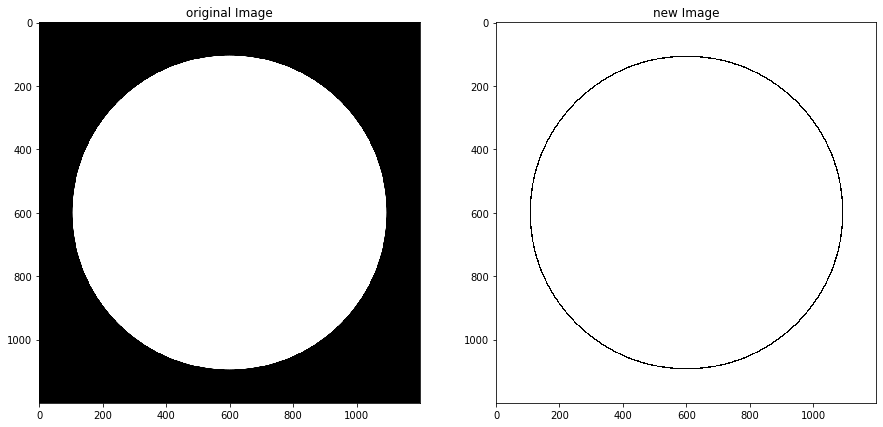

In [32]:
img = Image.open("image_Assets/random-Image/circle.png").convert("L")
# img = binaryImg(img,153)
dImg = laplacian_filter(img)
showImg(img,dImg)


In [314]:
# Img = removeSmallDetails(newImg,255,0,size=(7,7))
# # Img  = max_filter(Img)
# showImg(newImg,Img)
chainCode = chainCode_Generator(Img)
chainCode

[(106, 581), (106, 591), (106, 601), (106, 611), (106, 621)]

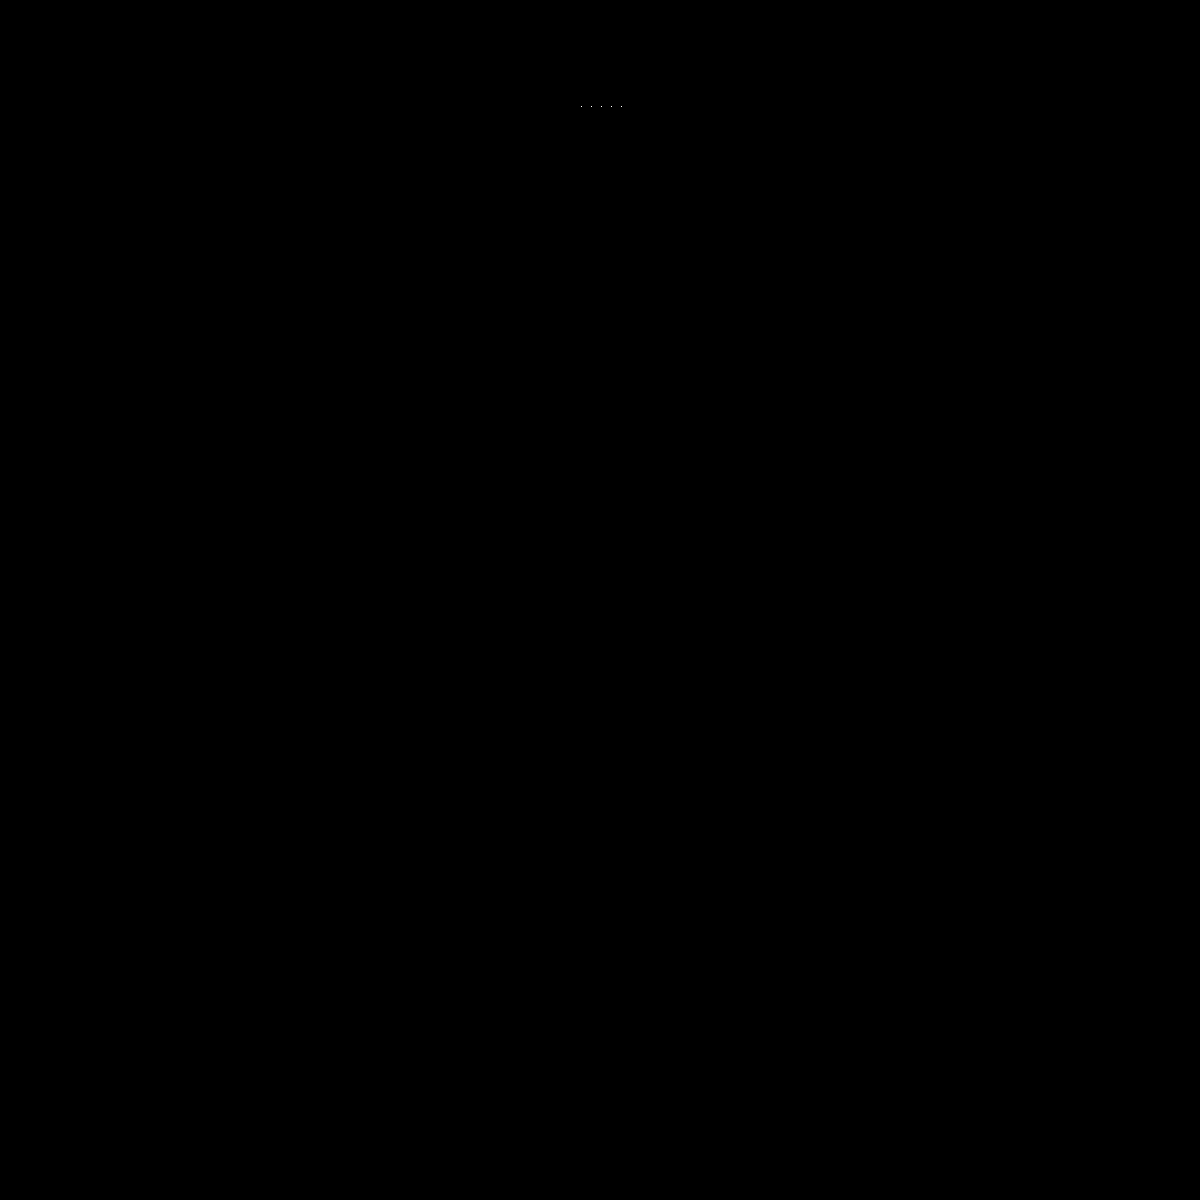

In [311]:
#chainCoding Decoding
matrix = img2matrix(img)
newMatrix = np.zeros_like(matrix)

for i in range(newMatrix.shape[0]):
    for j in range(newMatrix.shape[1]):
        if (i,j) in chainCode:
            newMatrix[i][j] = 255

matrix2img(newMatrix)

In [50]:
#=_

In [312]:
from ipycanvas import Canvas

canvas = Canvas(width = 500 , height= 500 )

canvas.begin_path()
canvas.move_to(chainCode[0], chainCode[1])

for pos in chainCode:
    canvas.line_to(pos[1], pos[0])
    canvas.stroke()


In [22]:
canvas


Canvas(width=500)

3.141592653589793

# connected components in binary Image

In [50]:
def isConnected(matrix,x,y,bgPix= 2000 ): #check four connected
    if matrix[x][y-1] == matrix[x-1][y]== bgPix: #not connected
        return 0
    elif (matrix[x][y-1]== matrix[x][y]) and (matrix[x-1][y] == matrix[x][y] ): #fully connected
        return 1
    elif (matrix[x][y-1]== bgPix) ^ (matrix[x-1][y] == bgPix): # not conflict
        return 2
    else: #conflict
        return 3 

In [55]:
def labelConnectedComponents(matrix,bgPix = 2000 ,objPix=0):
#     imgMatrix = img2matrix(image)
    
    imgMatrix = matrix
    equivalencyList = []
    label = -1
    for row in range(1,imgMatrix.shape[0]):
        for col in range(1,imgMatrix.shape[1]):
            if imgMatrix[row][col] != bgPix:
                if isConnected(imgMatrix,row,col) == 0:
                        label += 1    
#                         equivalencyList.append({"label":label,"equivalent":label})
                        equivalencyList.append(label) # index == pixLable and label == equivalent pixLable
                                                     # for eg, label[1] = 2 ,  1 -> 2 , 1 equivalent to 2
                        imgMatrix[row][col] = label
                elif isConnected(imgMatrix,row,col) == 1:
                    imgMatrix[row][col] = imgMatrix[row][col-1] 
                    
                elif isConnected(imgMatrix,row,col) == 2:
                
                    imgMatrix[row][col] = min(imgMatrix[row][col-1] , imgMatrix[row-1][col])
                    
                else : # conflict
                    try:
                        newLabel = min(imgMatrix[row][col-1] , imgMatrix[row-1][col]) 
                        equPix  = max(imgMatrix[row][col-1] , imgMatrix[row-1][col]) 
                        imgMatrix[row][col] = newLabel
                        equivalencyList[equPix] = newLabel
                    
                    except Exception as e:
                        pass
                    
                    
#     print("equivalencyList")
#     for i in range(len(equivalencyList)):
#         print(f"{i}-->{equivalencyList[i]}")
        
    #perform scan to apply equivalent pixels

    
    for row in range(imgMatrix.shape[0]):
        for col in range(imgMatrix.shape[1]):
            if imgMatrix[row][col] != bgPix:
                imgMatrix[row][col] = getEquivalentPix(equivalencyList,imgMatrix[row][col])
    
    return imgMatrix

In [37]:
def getEquivalentPix(eqList,pixValue):
    if eqList[pixValue] != pixValue :
        pixValue = getEquivalentPix(eqList,eqList[pixValue])
    return pixValue



In [38]:
newImg =labelConnectedComponents(dImg)

equivalencyList
0-->0
1-->0
2-->2
3-->3
4-->3
5-->4
6-->5
7-->6
8-->7
9-->9
10-->10
11-->11
12-->12
13-->13
14-->14
15-->15
16-->15
17-->16
18-->17
19-->18
20-->19
21-->21
22-->21
23-->22
24-->23
25-->24
26-->25
27-->26
28-->27
29-->28
30-->30
31-->30
32-->31
33-->32
34-->33
35-->34
36-->35
37-->36
38-->37
39-->38
40-->39
41-->40
42-->41
43-->42
44-->44
45-->44
46-->45
47-->46
48-->48
49-->48
50-->49
51-->50
52-->52
53-->52
54-->53
55-->54
56-->55
57-->56
58-->57
59-->58
60-->30
61-->30
62-->30
63-->30
64-->63
65-->64
66-->65
67-->66
68-->67
69-->68
70-->69
71-->70
72-->71
73-->72
74-->73
75-->74
76-->75
77-->76
78-->77
79-->78
80-->79
81-->80
82-->81
83-->82
84-->83
85-->84
86-->85
87-->86
88-->87
89-->88
90-->89
91-->90
92-->91
93-->92
94-->93
95-->94
96-->95
97-->96
98-->97
99-->98
100-->99
101-->100
102-->101
103-->102
104-->103
105-->104
106-->105
107-->106
108-->107
109-->108
110-->109
111-->110
112-->111
113-->112
114-->113
115-->114
116-->115
117-->116
118-->117
119-->118
120--

In [61]:
# test canvas for matrix
from ipycanvas import Canvas

def drawMatrix(matrix,labelsCoordinates):
    
    canvas = Canvas(width = matrix.shape[1] , height= matrix.shape[0])
    canvas.begin_path()
  
    for item in labelsCoordinates:
        canvas.move_to(item["coordinates"][0][1],item["coordinates"][0][0])
        for pos in item["coordinates"]:
            canvas.line_to(pos[1], pos[0])

        canvas.stroke()

    return canvas



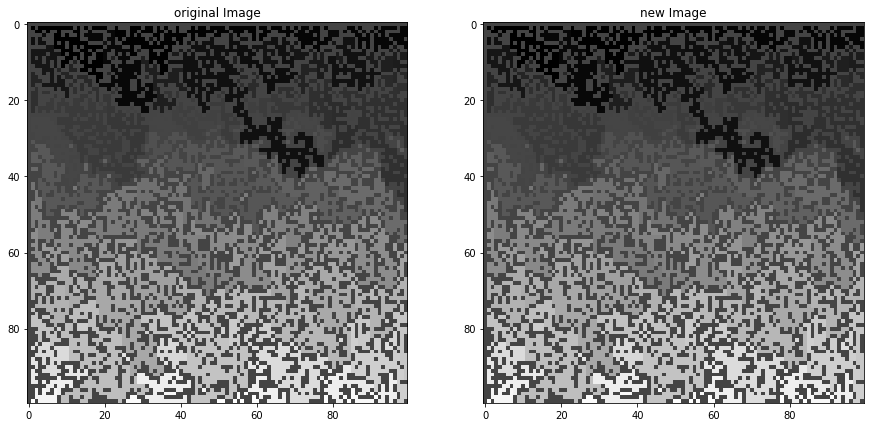

In [59]:
showImg(matrix,matrixImg)

In [62]:
# print(connectedList)
drawMatrix(matrix,connectedList)

Canvas(height=100, width=100)

In [48]:
# change 255 value to 2000

def encodeBackgroundPix(matrix,bgPix = 255,encodingValue=2000): # encodingValue  is a new temp pix value
        newMatrix = np.full((matrix.shape[0],matrix.shape[1]),encodingValue)
        
        for row in range(newMatrix.shape[0]):
            for col in range(newMatrix.shape[1]):
                if matrix[row][col] != bgPix :
                    newMatrix[row][col]  = matrix[row][col]
        return newMatrix

def decodingBackgroundPix(matrix,bgPix = 255 , encodingValue  = 2000):
    for row in range(matrix.shape[0]):
        for col in range(matrix.shape[1]):
            if matrix[row][col]  == encodingValue:
                matrix[row][col]  = bgPix
    
    return matrix
    
    
eMatrix  = encodeBackgroundPix(matrix)
decodingBackgroundPix(eMatrix)

array([[255, 255, 255, ..., 255, 255, 255],
       [255,   0, 255, ..., 255,   0,   0],
       [255, 255,   0, ..., 255,   0,   0],
       ...,
       [255, 255,   0, ..., 255,   0,   0],
       [255, 255,   0, ..., 255,   0,   0],
       [255,   0, 255, ...,   0,   0, 255]])

In [56]:
matrix = np.full((100,100),255)
np.random.seed(1)
for i in range(1,matrix.shape[0]):
    for j in range(1,matrix.shape[1]):
        if np.random.random() < 0.6:
            matrix[i][j] = 0
print(matrix)

matrix = encodeBackgroundPix(matrix)
matrixImg = labelConnectedComponents(matrix)
matrixImg = decodingBackgroundPix(matrixImg)
print("------------")
print(matrixImg)
# connectedList = getLabelsCoordinates(img2matrix(matrixImg))
connectedList = getLabelsCoordinates(matrixImg)

connectedList


[[255 255 255 ... 255 255 255]
 [255   0 255 ... 255   0   0]
 [255 255   0 ... 255   0   0]
 ...
 [255 255   0 ... 255   0   0]
 [255 255   0 ... 255   0   0]
 [255   0 255 ...   0   0 255]]
------------
[[255 255 255 ... 255 255 255]
 [255   0 255 ... 255  26  26]
 [255 255   1 ... 255  26  26]
 ...
 [255 255 914 ... 255 772 772]
 [255 255 914 ... 255 772 772]
 [255 946 255 ... 772 772 255]]


[{'label': 0, 'coordinates': [(1, 1)]},
 {'label': 1,
  'coordinates': [(1, 3),
   (1, 4),
   (1, 5),
   (1, 6),
   (1, 7),
   (1, 8),
   (1, 9),
   (1, 10),
   (1, 11),
   (1, 13),
   (2, 2),
   (2, 3),
   (2, 5),
   (2, 8),
   (2, 12),
   (2, 13),
   (3, 7),
   (3, 8),
   (3, 10),
   (3, 13),
   (4, 7),
   (4, 8),
   (4, 9),
   (4, 10),
   (4, 11),
   (4, 12),
   (4, 13),
   (5, 7),
   (5, 9),
   (5, 11),
   (5, 12),
   (5, 13),
   (5, 14),
   (5, 15),
   (6, 7),
   (6, 8),
   (6, 9),
   (6, 11),
   (6, 13),
   (6, 15),
   (6, 16),
   (6, 17),
   (6, 18),
   (6, 19),
   (7, 9),
   (7, 10),
   (7, 11),
   (7, 14),
   (7, 15),
   (7, 17),
   (8, 9),
   (8, 11),
   (8, 12),
   (8, 13),
   (8, 15),
   (8, 16),
   (8, 18),
   (8, 19),
   (9, 10),
   (9, 11),
   (9, 13),
   (9, 15),
   (9, 18),
   (9, 19),
   (10, 9),
   (10, 10),
   (10, 14),
   (10, 15),
   (10, 17),
   (10, 18),
   (10, 19),
   (11, 9),
   (11, 15),
   (11, 16),
   (11, 17),
   (11, 18),
   (11, 19),
   (12, 14),
   (12

In [63]:
matrix = img2matrix(newImg)
labelsCoordinates = getLabelsCoordinates(matrix)
labelsCoordinates[1]

{'label': 2,
 'coordinates': [(108, 547),
  (108, 548),
  (108, 549),
  (108, 550),
  (108, 551),
  (108, 552),
  (108, 553),
  (108, 554),
  (108, 555),
  (108, 556),
  (109, 547),
  (109, 548),
  (109, 549),
  (109, 550),
  (109, 551),
  (109, 552),
  (109, 553),
  (109, 554),
  (109, 555),
  (109, 556),
  (110, 547),
  (110, 548),
  (110, 549),
  (110, 550),
  (110, 551),
  (110, 552),
  (110, 553),
  (110, 554),
  (110, 555),
  (110, 556),
  (111, 547),
  (111, 548),
  (111, 549),
  (111, 550),
  (111, 551),
  (111, 552),
  (111, 553),
  (111, 554),
  (111, 555),
  (111, 556),
  (112, 547),
  (425, 137),
  (426, 137),
  (427, 137),
  (428, 137),
  (429, 137),
  (430, 137),
  (431, 137),
  (432, 137),
  (433, 137),
  (434, 137),
  (435, 137),
  (436, 137),
  (1028, 838),
  (1028, 839),
  (1029, 838),
  (1029, 839),
  (1030, 838),
  (1030, 839),
  (1031, 838),
  (1031, 839),
  (1032, 838),
  (1032, 839)]}

In [65]:
from ipycanvas import Canvas

canvas = Canvas(width = 1500 , height= 1500)

canvas.begin_path()
count = 0
for item in labelsCoordinates:
   
    
    canvas.move_to(item["coordinates"][0][1],item["coordinates"][0][0])
    
    for pos in item["coordinates"]:
        canvas.line_to(pos[1], pos[0])
    
    canvas.stroke()
    break;
        
canvas

Canvas(height=1500, width=1500)

In [66]:
def getIndex(labelsList,Label): # return the index where label is equals to Label 
    for index,item in enumerate(labelsList):
        if item["label"] == Label:
            return(index)
        
        
def getLabelsCoordinates(matrix , bgPix = 255):
    labelsCoordinates = []
    addedPixels = []

    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            pix = matrix[i][j]
            if pix != bgPix:
                if (pix not in addedPixels):
                    labelsCoordinates.append({"label" : pix ,"coordinates" :[(i,j)]})
                    addedPixels.append(pix)
                else:

                    index = getIndex(labelsCoordinates,pix)
                    labelsCoordinates[index]["coordinates"].append((i,j))

    return labelsCoordinates


In [449]:
l = [{"key":1,"value":2},{"key":2,"value":2},{"key":3,"value":2}]

for index,item in enumerate(l):
    if item["key"] == 2:
        print(index)
    




1
